In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
#Create an empty graph with no nodes or edges
G = nx.Graph()

In [9]:
#Add nodes to the graph

G.add_node('1')
G.add_node(1)
G.add_node('second')

# G.add_node({'dictionary': 'will throw error'})

In [10]:
# In NetworkX, nodes can be any hashable object e.g. a text string, an image,
# an XML object, another Graph, a customized node object, etc.

list_of_nodes = ([1, 2, 3, 'node4'])

In [11]:
#Access nodes in a Graph object

G.nodes()

NodeView(('1', 1, 'second'))

In [13]:
# NetworkX has a lot of graph generators path_graph is one of them.
H = nx.path_graph(11)
print(H.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [14]:
G.add_nodes_from(H)
print(G.nodes())

['1', 1, 'second', 0, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [16]:
#Difference btw 'add_nodes_from' and 'add_node':
G.add_node(H)
print(G.nodes())

['1', 1, 'second', 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, <networkx.classes.graph.Graph object at 0x1071ff9b0>]


In [17]:
#Edges
#An edges between two nodes indicates they share a relationship/property
#G.add_edge(source, target)
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')

list_of_edges = [(2, 3), (4, 5), ('node4', 0)]
G.add_edges_from(list_of_edges)

#Show the edges
G.edges()

EdgeView([('second', 0), ('second', 'node4'), (0, 'node4'), (2, 3), (4, 5)])

In [18]:
#Number of nodes and edges
print(G.number_of_nodes(), len(G), len(G.nodes()))
print(G.number_of_edges(), len(G.edges()))

15 15 15
5 5


In [19]:
print(G.number_of_nodes())

15


In [25]:
#remove node
print(G.nodes())
G.remove_node(0)
print(G.nodes())

['1', 1, 'second', 2, 3, 4, 5, 6, 7, 8, 9, 10, <networkx.classes.graph.Graph object at 0x1071ff9b0>, 'node4', 0]
['1', 1, 'second', 2, 3, 4, 5, 6, 7, 8, 9, 10, <networkx.classes.graph.Graph object at 0x1071ff9b0>, 'node4']


In [27]:
#remove edge
print(G.edges())
G.remove_edge(4, 5)
print(G.edges())

[('second', 'node4'), (2, 3), (4, 5)]
[('second', 'node4'), (2, 3)]


In [28]:
#Clear all nodes and edges from the graph
G.clear()
print(G.nodes(), G.edges())

[] []


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


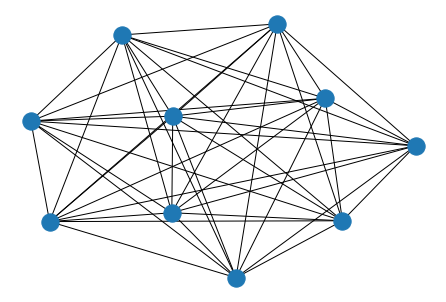

In [33]:
#Another generator example to create a Erdos-Reyni Graph - a random generator
#nx.graph_generator(num_of_nodes, probability_for_edge_creation, seed for random number generator, directed=False by default)
G = nx.erdos_renyi_graph(10, 1.0, seed=1)

#Check out the nodes and edges
print(G.nodes())
print(G.edges())
#To draw the graph:
nx.draw(G)

In [34]:
#Create an adjacency matrix
matrix = nx.to_numpy_matrix(G)
print(matrix)

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]]


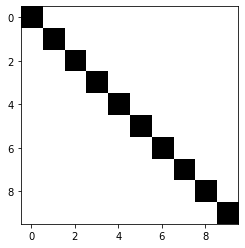

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

In [37]:
#Adding attributes and weights
#.add_edge(source, target, weight)
G.add_edge(1, 2, weight = 4.7)

#add multiple edges
G.add_edges_from([(3, 4), (4, 5)], color = 'red')

#another way
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

#Another way
G[1][2]['weight'] = 4.7

In [39]:
#Add attribute data to a node
G.add_node(1, time = '13:00')
print(G.nodes())
print(G.nodes(data=True))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[(0, {}), (1, {'time': '13:00'}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {})]


In [41]:
#Accessing the graph dictionary
print('nodes: ', G.nodes())
print('edges: ', G.edges())

#dict of nodes connected to x node
print(G[0])
#Attributes of all nodes
print(G[1])
#Attributes btw two nodes
print(G[1][2])

nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
{1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
{0: {}, 2: {'weight': 4.7, 'color': 'blue'}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
{'weight': 4.7, 'color': 'blue'}


In [43]:
#print the connections of node 1
print(G[1])

#print the attributes btw node 1 and node 2
print(G[1][2])

#print the color attribute btw node 1 and 2
print(G[1][2]['color'])

{0: {}, 2: {'weight': 4.7, 'color': 'blue'}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
{'weight': 4.7, 'color': 'blue'}
blue


# Another generator example

In [45]:
G = nx.Graph()

list_of_cities = [('Paris', 'Warsaw', 841), ('Warsaw', 'Berlin', 584), ('Berlin', 'London', 1101), ('Paris', 'Barcelona', 1038)]

#turn the above list into a network and add the weights
G.add_weighted_edges_from(list_of_cities)

print(G.nodes())
print(G.edges(data=True))

['Paris', 'Warsaw', 'Berlin', 'London', 'Barcelona']
[('Paris', 'Warsaw', {'weight': 841}), ('Paris', 'Barcelona', {'weight': 1038}), ('Warsaw', 'Berlin', {'weight': 584}), ('Berlin', 'London', {'weight': 1101})]


In [46]:
#Iterate through the edges and find the highest weight
result = max([w['weight'] for s, t, w in G.edges(data=True)])
print(result)

1101


# Understanding the dynamics of a network

In [47]:
#start with a randomly generated graph
G = nx.erdos_renyi_graph(20, 0.15, seed=1)

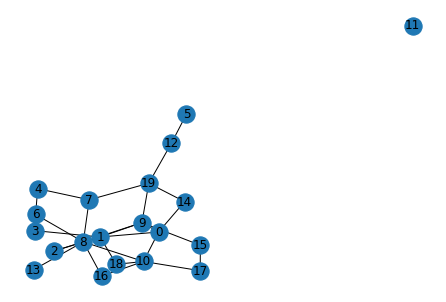

In [48]:
#Draw the graph with labels
nx.draw(G, with_labels=True)

# Evaluating the importance of individuals in a network

Approach 1: Neighbours

The number of nodes an individual node is connected to

In [49]:
#Find the neighbours of node 8
list(G.neighbors(8))

[2, 6, 7, 9, 10, 13, 16]

Approach 2: Degree Centrality

The number of other nodes that one node is connected to is a measure of its centrality. Degree centrality is the number of neighbours to a node, normalised to the total number of possible nodes that it can be connected to.

In [50]:
#This can be accessed using the nx.degree_centrality(G)
nx.degree_centrality(G)

{0: 0.21052631578947367,
 1: 0.2631578947368421,
 2: 0.10526315789473684,
 3: 0.10526315789473684,
 4: 0.10526315789473684,
 5: 0.05263157894736842,
 6: 0.15789473684210525,
 7: 0.15789473684210525,
 8: 0.3684210526315789,
 9: 0.2631578947368421,
 10: 0.2631578947368421,
 11: 0.0,
 12: 0.10526315789473684,
 13: 0.05263157894736842,
 14: 0.10526315789473684,
 15: 0.10526315789473684,
 16: 0.10526315789473684,
 17: 0.10526315789473684,
 18: 0.10526315789473684,
 19: 0.21052631578947367}

In [52]:
#put the first five in a list
list(nx.degree_centrality(G).items())[0:5]

[(0, 0.21052631578947367),
 (1, 0.2631578947368421),
 (2, 0.10526315789473684),
 (3, 0.10526315789473684),
 (4, 0.10526315789473684)]

There are other measures of centrality, namely betweenness centrality, flow centrality and load centrality. The NetworkX API docs that document the centrality measures are here: http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.centrality.html?highlight=centrality#module-networkx.algorithms.centrality

# Real world dataset

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

source: http://snap.stanford.edu/data/index.html#canets

In [73]:
#read as adjacency list and print the nodes and edges
import csv
authors_graph = nx.read_adjlist('CA-GrQc.txt', delimiter='\t')

In [77]:
print(authors_graph.nodes(), authors_graph.edges())

['3466', '937', '5233', '8579', '10310', '15931', '17038', '18720', '19607', '1854', '4583', '9572', '10841', '13056', '14982', '16310', '19640', '23855', '24372', '24814', '5052', '899', '1796', '2287', '3096', '3386', '4472', '5346', '5740', '6094', '6376', '9124', '10235', '10427', '10597', '15159', '16148', '16741', '18235', '18549', '19297', '20511', '20595', '20613', '24371', '24559', '24731', '25102', '25271', '25396', '1658', '4822', '6864', '7689', '7926', '10268', '12971', '18600', '20421', '20886', '21048', '22393', '23186', '23214', '23298', '23945', '24939', '339', '624', '3731', '4743', '5407', '6610', '6700', '8045', '9099', '9639', '9785', '12141', '15184', '15784', '18719', '19870', '20532', '22527', '23576', '23577', '23649', '24199', '24293', '25201', '10243', '6774', '8049', '8053', '8517', '11964', '15538', '16694', '18648', '19423', '21012', '22457', '22691', '23452', '16174', '16470', '17822', '14265', '392', '2485', '2949', '3173', '3441', '3593', '3853', '3927'

In [82]:
# Neighbors/ degree of node is one way of calculating the importance
# of nodea and finding influential nodes.

#Print the neighbors of node 22504
print(list(authors_graph.neighbors('22504')))

['6512', '20574', '15244', '24718', '15010', '88', '1995', '2338', '2530', '2535', '4755', '5210', '23712', '6340', '7197', '7635', '8727', '9656', '9869', '10350', '12507', '12710', '14766', '15245', '15457', '15933', '16654', '17807', '18225', '19446', '19645', '19939', '20576']


In [83]:
#Print the number of neighbors of 22504
print(len(list(authors_graph.neighbors('22504'))))

33


In [84]:
#nx.degree() is another way
print(nx.degree(authors_graph, ['22504']))

[('22504', 33)]


In [86]:
#And another way
print(authors_graph.degree(['22504']))

[('22504', 33)]


Create a list of (node, degree of node) tuples and find the node with maximum degree

In [88]:
result = [(node, len(list(authors_graph.neighbors(node)))) for node in authors_graph.nodes()]

In [92]:
#find the max result
max(result, key=lambda node:node[1])

('21012', 81)

In [93]:
authors_graph.degree()['21012']

81

In [94]:
authors_graph.degree()

DegreeView({'3466': 8, '937': 5, '5233': 2, '8579': 5, '10310': 13, '15931': 10, '17038': 17, '18720': 3, '19607': 4, '1854': 8, '4583': 3, '9572': 34, '10841': 7, '13056': 10, '14982': 2, '16310': 17, '19640': 25, '23855': 8, '24372': 1, '24814': 21, '5052': 29, '899': 3, '1796': 2, '2287': 14, '3096': 12, '3386': 11, '4472': 4, '5346': 20, '5740': 1, '6094': 4, '6376': 2, '9124': 24, '10235': 13, '10427': 8, '10597': 6, '15159': 4, '16148': 18, '16741': 7, '18235': 1, '18549': 1, '19297': 16, '20511': 32, '20595': 9, '20613': 10, '24371': 22, '24559': 23, '24731': 1, '25102': 7, '25271': 16, '25396': 23, '1658': 6, '4822': 2, '6864': 2, '7689': 32, '7926': 9, '10268': 7, '12971': 1, '18600': 4, '20421': 3, '20886': 2, '21048': 6, '22393': 5, '23186': 6, '23214': 4, '23298': 2, '23945': 3, '24939': 3, '339': 30, '624': 17, '3731': 9, '4743': 25, '5407': 9, '6610': 68, '6700': 31, '8045': 15, '9099': 9, '9639': 31, '9785': 68, '12141': 5, '15184': 13, '15784': 11, '18719': 22, '19870':

In [96]:
nx.degree_centrality(authors_graph)

{'3466': 0.0015264262545315779,
 '937': 0.0009540164090822362,
 '5233': 0.00038160656363289447,
 '8579': 0.0009540164090822362,
 '10310': 0.002480442663613814,
 '15931': 0.0019080328181644724,
 '17038': 0.003243655790879603,
 '18720': 0.0005724098454493417,
 '19607': 0.0007632131272657889,
 '1854': 0.0015264262545315779,
 '4583': 0.0005724098454493417,
 '9572': 0.006487311581759206,
 '10841': 0.0013356229727151307,
 '13056': 0.0019080328181644724,
 '14982': 0.00038160656363289447,
 '16310': 0.003243655790879603,
 '19640': 0.004770082045411181,
 '23855': 0.0015264262545315779,
 '24372': 0.00019080328181644724,
 '24814': 0.0040068689181453915,
 '5052': 0.00553329517267697,
 '899': 0.0005724098454493417,
 '1796': 0.00038160656363289447,
 '2287': 0.0026712459454302615,
 '3096': 0.0022896393817973667,
 '3386': 0.0020988360999809196,
 '4472': 0.0007632131272657889,
 '5346': 0.003816065636328945,
 '5740': 0.00019080328181644724,
 '6094': 0.0007632131272657889,
 '6376': 0.00038160656363289447,

Plot degree centrality of authors_graph.

(count vs degree centrality)

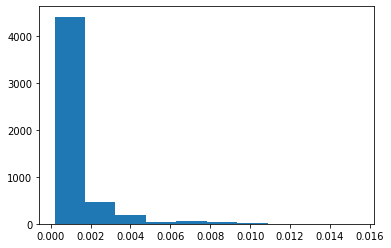

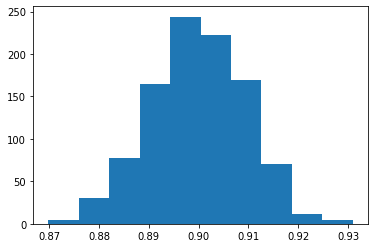

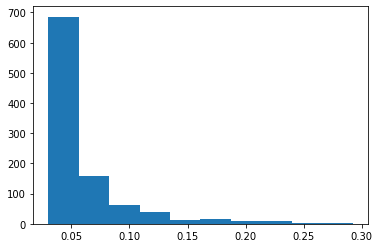

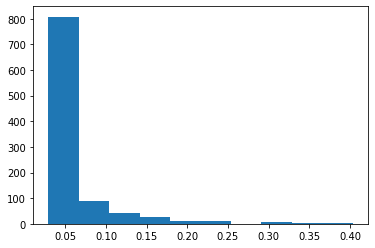

In [99]:
plt.hist(list(nx.degree_centrality(authors_graph).values()))
plt.show()

G = nx.erdos_renyi_graph(1000, 0.9, seed=1)
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

H = nx.barabasi_albert_graph(1000, 30)
K = nx.powerlaw_cluster_graph(1000, 30, 0.3)

plt.hist(list(nx.degree_centrality(H).values()))
plt.show()

plt.hist(list(nx.degree_centrality(K).values()))
plt.show()

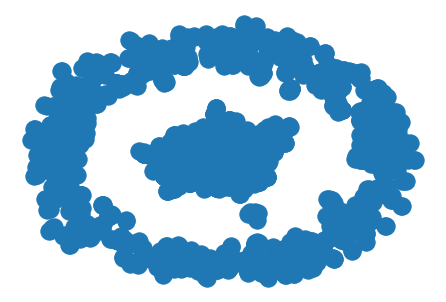

In [100]:
nx.draw(authors_graph)